In [4]:
#!pip install vaderSentiment
#!pip install nltk

# Load thelibraries
import requests
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import nltk
# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer


from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
url = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=1000d&before=1d&sort=asc&size=500"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data['data'])

In [6]:
url2 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=2000d&before=1001d&sort=asc&size=500"
response2 = requests.get(url2)
data2 = response2.json()
df2 = pd.DataFrame(data2['data'])

In [7]:
url3 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=3000d&before=2001d&sort=asc&size=500"
response3 = requests.get(url3)
data3 = response3.json()
df3 = pd.DataFrame(data3['data'])


In [8]:
url4 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=4000d&before=3001d&sort=asc&size=500"
response4 = requests.get(url4)
data4 = response4.json()
df4 = pd.DataFrame(data4['data'])

In [9]:
url5 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&before=4001d&sort=asc&size=500"
response5 = requests.get(url5)
data5 = response5.json()
df5 = pd.DataFrame(data5['data'])

In [10]:
comment_url = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=150d&before=1d&sort=asc&size=500"
comment_response = requests.get(comment_url)
comment_data = comment_response.json()
comment_df = pd.DataFrame(comment_data['data'])

In [11]:
comment_url2 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=350d&before=151d&sort=asc&size=500"
comment_response2 = requests.get(comment_url2)
comment_data2 = comment_response2.json()
comment_df2 = pd.DataFrame(comment_data2['data'])

In [12]:
comment_url3 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=600d&before=351d&sort=asc&size=500"
comment_response3 = requests.get(comment_url3)
comment_data3 = comment_response3.json()
comment_df3 = pd.DataFrame(comment_data3['data'])

In [13]:
comment_url4 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=850d&before=601d&sort=asc&size=500"
comment_response4 = requests.get(comment_url4)
comment_data4 = comment_response4.json()
comment_df4 = pd.DataFrame(comment_data4['data'])

In [14]:
comment_url5 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=1050d&before=851d&sort=asc&size=500"
comment_response5 = requests.get(comment_url5)
comment_data5 = comment_response5.json()
comment_df5 = pd.DataFrame(comment_data5['data'])

In [15]:
comment_url6 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=1300d&before=1051d&sort=asc&size=500"
comment_response6 = requests.get(comment_url6)
comment_data6 = comment_response6.json()
comment_df6 = pd.DataFrame(comment_data6['data'])

In [16]:
Comments = df.selftext 
Comments2 = df2.selftext 
Comments3 = df3.selftext 
Comments4 = df4.selftext 
Comments5 = df5.selftext 

Replies = comment_df.body
Replies2 = comment_df2.body
Replies3 = comment_df3.body
Replies4 = comment_df4.body
Replies5 = comment_df5.body
Replies6 = comment_df6.body

In [17]:
Comments.shape

(93,)

In [18]:
Comments2.shape

(72,)

In [19]:
Comments3.shape

(35,)

In [20]:
Comments4.shape

(14,)

In [21]:
Comments5.shape

(2,)

In [22]:
Replies.shape

(99,)

In [23]:
Replies2.shape

(100,)

In [24]:
Replies3.shape

(100,)

In [25]:
Replies4.shape

(99,)

In [26]:
Replies5.shape

(80,)

In [27]:
Replies6.shape

(91,)

In [28]:
 All_Comments = pd.concat ([Comments, Comments2, Comments3, Comments4, Comments5, Replies, Replies2, Replies3, Replies4, Replies5, Replies6])

In [29]:
All_Comments.shape

(785,)

In [30]:
All_Comments2 = pd.DataFrame(All_Comments)

In [31]:
All_Comments2.rename(columns={ All_Comments2.columns[0]: "Text" }, inplace = True)
All_Comments2.index.names = ['Number']
All_Comments2.describe

<bound method NDFrame.describe of                                                      Text
Number                                                   
0       While vaccines are starting to be administered...
1         First off I would like to say I'm not even I...
2       While vaccines are starting to be administered...
3       I just wanted to make this post to outline wha...
4       While vaccines are starting to be administered...
...                                                   ...
86      Sorry if the information I've provided was mis...
87      Ireland and the UK have a very different appro...
88      article text:    \nThat could weaken the union...
89      article text:    \nThat could weaken the union...
90      &gt; Forget Project Fear – Brexit reality is b...

[785 rows x 1 columns]>

# VADER Sentiment Analysis

In [32]:
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()


* a positive sentiment, compound ≥ 0.05.
* a negative sentiment, compound ≤ -0.05.
* a neutral sentiment, the compound is between ]-0.05, 0.05[

In [33]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound'] >= 0.05):
    polarity = "positive"

  elif(output_dict['compound'] <= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

In [34]:
All_Comments2["vader_prediction"] = All_Comments2["Text"].apply(predict_sentiment)

In [35]:
All_Comments2.sample(5)

Text vader_prediction
Number                                                                    
52      Your first paragraph has explained Dublin pret...         positive
77      Well, as to why we don’t send firefighters, th...         negative
68      One whole life? A single generation? Sure Dubl...         negative
28      \nI thought it was for social housing leasing ...         positive
88      article text:    \nThat could weaken the union...         positive

In [36]:
All_Comments2['Sentiment_Score'] = np.where(All_Comments2['vader_prediction'] == 'positive', 1, 0)

Overall_DF_Valence = All_Comments2['Sentiment_Score'].mean()

Overall_DF_Valence

0.7019108280254777

# The polarity of the sentiment in our reddit scrape is positive regarding Irish Transportation on averaage.

#  Logistic-regression Model Sentiment Analysis

In [37]:
BoWDF = All_Comments2

In [38]:
BoWDF['Sentiment_Score'] = np.where(BoWDF['vader_prediction'] == 'positive', 1, 0)

In [39]:
BoWDF.sample(5)

Text vader_prediction  \
Number                                                                       
40      I looked into getting a canal house boat coupl...         positive   
53      TAKE ONE: IRISH RESCUE COLLECTING LIKES!\n\n&a...         positive   
36      A new housing movement will be the dominant fo...         negative   
49      As far as infrastructure goes \n\nOffshore win...         positive   
18      🎯 Do You want free checkups for your Ebike? \n...         positive   

        Sentiment_Score  
Number                   
40                    1  
53                    1  
36                    0  
49                    1  
18                    1

In [40]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words = 'english',ngram_range = (1, 2),tokenizer = token.tokenize, min_df = 20)
text_counts = cv.fit_transform(BoWDF['Text'])
y = BoWDF['Sentiment_Score']

text_counts

<785x1577 sparse matrix of type '<class 'numpy.int64'>'
	with 83122 stored elements in Compressed Sparse Row format>

In [41]:
#Splitting the data into trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, y, test_size=0.5, random_state=0)

In [42]:
text_counts.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((785, 1577), (392, 1577), (393, 1577), (392,), (393,))

In [43]:
# Training the model

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.7531806615776081


In [44]:
model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

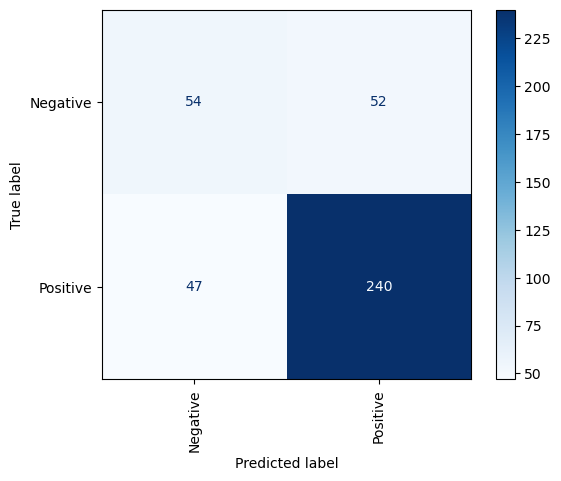

In [45]:
%matplotlib inline

cmd.from_estimator(model, X_test, Y_test,
                   display_labels=['Negative', 'Positive'],
                   cmap='Blues', xticks_rotation='vertical')

Testing the model wtih a test input for face validity

In [46]:
review = 'The long commutes  was extremely bad.'
model.predict_proba(cv.transform([review]))[0][1]

0.44551217871362503

# Bag of Workds Sentiment Analysis

In [47]:
BoWDF = All_Comments2

In [48]:
# Instantiate an object cv by calling a method named as CountVectorzer()
cv1    = CountVectorizer(stop_words = 'english',ngram_range = (1, 2),tokenizer = token.tokenize)

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(BoWDF['Text'])

# Display the rows and colums
X_fin.shape



(785, 1577)

In [49]:
y1=BoWDF['Sentiment_Score']
y1.shape

(785,)

In [50]:
X_fin

<785x1577 sparse matrix of type '<class 'numpy.int64'>'
	with 83122 stored elements in Compressed Sparse Row format>

In [51]:
# Instantiate an object model by calling a method MultinomialNB()
model1 = MultinomialNB()

In [52]:
# Split the dataset into training and testing parts
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_fin, y1, test_size = 0.3)

In [53]:
# Train the model by calling a method fit()
model1.fit(X_train1,y_train1)

MultinomialNB()

In [54]:
# Call predict() method
y_pred = model1.predict(X_test1)

In [55]:
# Instantiate a mthod named as Cla
cf = classification_report(y_test1, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.74      0.21      0.32        68
           1       0.75      0.97      0.85       168

    accuracy                           0.75       236
   macro avg       0.74      0.59      0.58       236
weighted avg       0.75      0.75      0.70       236



Testing the model wtih a test input for face validity to compare against logistic regression model

In [56]:
#model1.predict_proba(cv1.transform([review]))[0][1]

In [57]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [58]:
#reading Dataset
#retail = pd.read_csv("Data/Irish Commuting Data by Area.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
retail = pd.read_csv("Data/Irish Commuting Data by Area.csv",  sep = ',', header= 0)

In [59]:
retail.describe()

Travelling_Time_Number  Persons_at_work_2016_VALUE  \
count              132.000000                  132.000000   
mean                40.166667                13030.325758   
std                 29.468360                16921.097412   
min                  1.000000                   14.000000   
25%                 15.000000                 1755.750000   
50%                 37.500000                 6369.000000   
75%                 60.000000                16883.500000   
max                 90.000000                84010.000000   

       Percentage_change_of_persons_at_work_2011_2016  \
count                                      132.000000   
mean                                        17.296970   
std                                         19.620666   
min                                        -34.900000   
25%                                          3.250000   
50%                                         13.650000   
75%                                         28.875000   
max                                         86.300000   

       Broad_Industrial_Group_Recoded  
count                      132.000000  
mean                        12.500000  
std                          6.368458  
min                          2.000000  
25%                          7.000000  
50%                         12.500000  
75%                         18.000000  
max                         23.000000

In [60]:
retail

Broad_Industrial_Group      Travelling_Time  \
0    Agriculture, forestry and fishing (A)             < ¼ hour   
1    Agriculture, forestry and fishing (A)    ¼ hour - < ½ hour   
2    Agriculture, forestry and fishing (A)    ½ hour - < ¾ hour   
3    Agriculture, forestry and fishing (A)    ¾ hour - < 1 hour   
4    Agriculture, forestry and fishing (A)  1 hour - < 1½ hours   
..                                     ...                  ...   
127                    Industry not stated    ¼ hour - < ½ hour   
128                    Industry not stated    ½ hour - < ¾ hour   
129                    Industry not stated    ¾ hour - < 1 hour   
130                    Industry not stated  1 hour - < 1½ hours   
131                    Industry not stated    1½ hours and over   

     Travelling_Time_Number  Persons_at_work_2016_VALUE  \
0                         1                       19577   
1                        15                        9910   
2                        30                        5557   
3                        45                        1307   
4                        60                        1878   
..                      ...                         ...   
127                      15                       19896   
128                      30                       16484   
129                      45                        4542   
130                      60                        6206   
131                      90                        2550   

     Percentage_change_of_persons_at_work_2011_2016  \
0                                              -4.0   
1                                               3.3   
2                                               2.7   
3                                               8.1   
4                                              18.9   
..                                              ...   
127                                            28.4   
128                                            36.8   
129                                            42.1   
130                                            61.6   
131                                            67.5   

     Broad_Industrial_Group_Recoded  
0                                 2  
1                                 2  
2                                 2  
3                                 2  
4                                 2  
..                              ...  
127                              23  
128                              23  
129                              23  
130                              23  
131                              23  

[132 rows x 6 columns]

In [61]:
RFM = retail [ [ "Broad_Industrial_Group", "Travelling_Time_Number", "Persons_at_work_2016_VALUE", "Percentage_change_of_persons_at_work_2011_2016" ]].copy ()

In [62]:
RFM_norm1 = retail [ [ "Travelling_Time_Number", "Persons_at_work_2016_VALUE", "Percentage_change_of_persons_at_work_2011_2016" ]].copy ()

In [63]:
RFM_norm1

Travelling_Time_Number  Persons_at_work_2016_VALUE  \
0                         1                       19577   
1                        15                        9910   
2                        30                        5557   
3                        45                        1307   
4                        60                        1878   
..                      ...                         ...   
127                      15                       19896   
128                      30                       16484   
129                      45                        4542   
130                      60                        6206   
131                      90                        2550   

     Percentage_change_of_persons_at_work_2011_2016  
0                                              -4.0  
1                                               3.3  
2                                               2.7  
3                                               8.1  
4                                              18.9  
..                                              ...  
127                                            28.4  
128                                            36.8  
129                                            42.1  
130                                            61.6  
131                                            67.5  

[132 rows x 3 columns]

In [64]:
#Copy of the data before it's normalised in the next step
RFM_norm2 = RFM_norm1

In [65]:
# standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [66]:
RFM_norm1

array([[-1.33417245,  0.38836808, -1.08957064],
       [-0.85727676, -0.18510695, -0.71609658],
       [-0.3463171 , -0.44333978, -0.74679308],
       [ 0.16464256, -0.69546235, -0.4705246 ],
       [ 0.67560222, -0.66158894,  0.08201236],
       [ 1.69752154, -0.7273781 , -0.33239036],
       [-1.33417245, -0.69914038, -1.57048244],
       [-0.85727676, -0.67102129, -1.31979437],
       [-0.3463171 , -0.71551351, -1.02817764],
       [ 0.16464256, -0.75585312, -1.15607972],
       [ 0.67560222, -0.75620906,  0.13317319],
       [ 1.69752154, -0.76487021,  0.25595918],
       [-1.33417245,  2.08417413, -0.77237349],
       [-0.85727676,  3.1203089 , -0.54726584],
       [-0.3463171 ,  1.73897384, -0.17890787],
       [ 0.16464256,  0.09365162,  0.0103872 ],
       [ 0.67560222, -0.02588413,  0.48106683],
       [ 1.69752154, -0.51642567,  0.23549485],
       [-1.33417245, -0.68401302, -0.80306999],
       [-0.85727676, -0.57367232, -0.63935534],
       [-0.3463171 , -0.57705373, -0.250

# K-Means with some K

In [67]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

Frequency    Amount   Recency
0  -1.334172  0.388368 -1.089571
1  -0.857277 -0.185107 -0.716097
2  -0.346317 -0.443340 -0.746793
3   0.164643 -0.695462 -0.470525
4   0.675602 -0.661589  0.082012

In [107]:
# Kmeans
model_clus5 = KMeans(n_clusters = 3, max_iter=500)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=500, n_clusters=3)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [108]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

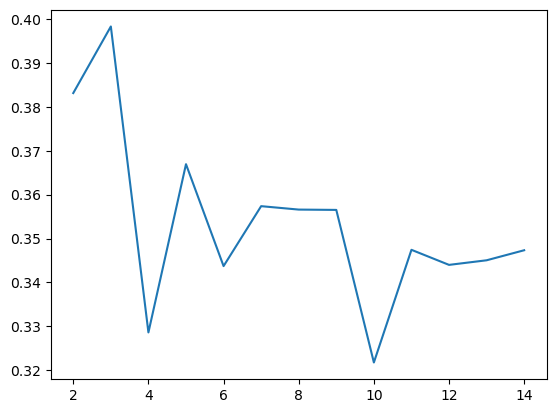

In [109]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

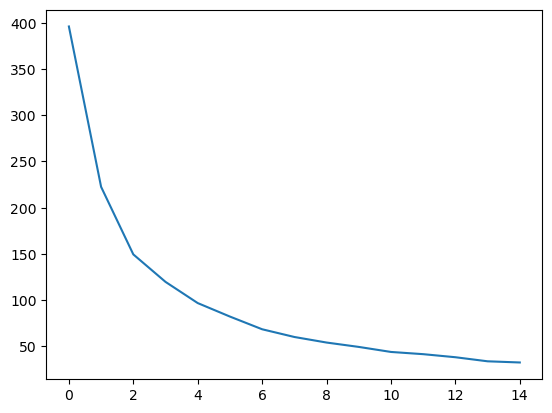

In [110]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,16)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=500)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [111]:
# analysis of clusters formed
RFM = RFM_norm2
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['Commute_Duration', 'Sample_Size', 'Sample_Volatility', 'ClusterID']

km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Sample_Size.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Commute_Duration.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Sample_Volatility.mean())

In [112]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Sample_Size", "Commute_Duration", "Sample_Volatility"]
df.head()

ClusterID   Sample_Size  Commute_Duration  Sample_Volatility
0          0  11419.566667         20.783333           5.028333
1          1  54409.714286         14.285714           6.292857
2          2   4708.500000         66.465517          32.644828

<Axes: xlabel='ClusterID', ylabel='Sample_Size'>

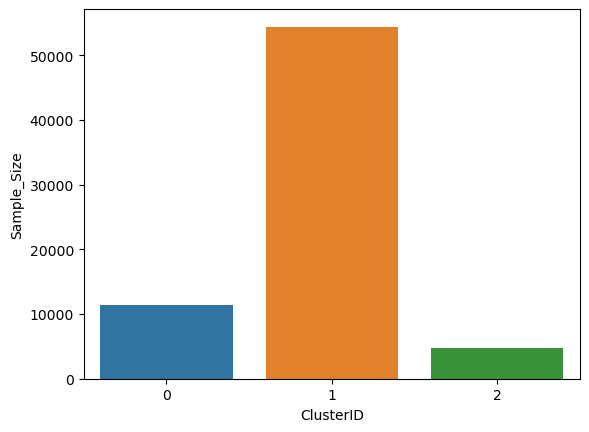

In [113]:
sns.barplot(x=df.ClusterID, y=df.Sample_Size)

<Axes: xlabel='ClusterID', ylabel='Commute_Duration'>

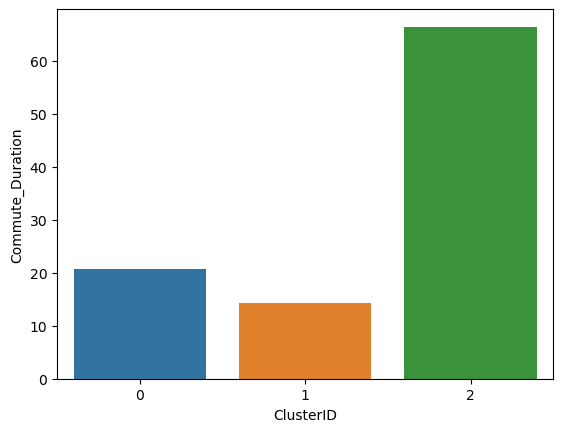

In [114]:
sns.barplot(x=df.ClusterID, y=df.Commute_Duration)

<Axes: xlabel='ClusterID', ylabel='Sample_Volatility'>

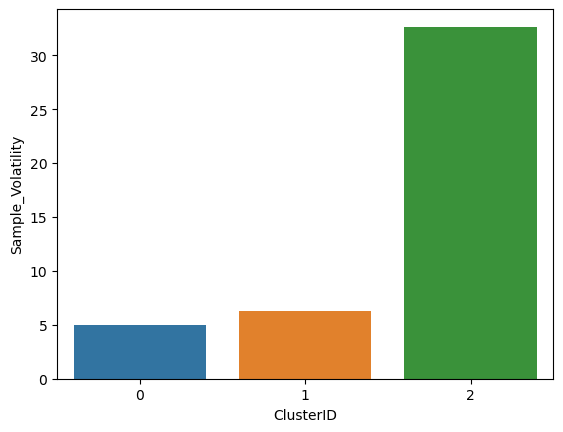

In [115]:
sns.barplot(x=df.ClusterID, y=df.Sample_Volatility)

In [81]:
# Import the necessary modules
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [82]:
# Load the dataset and split it into training and testing sets
#X, y = load_iris(return_X_y=True)
y = retail [ [ "Broad_Industrial_Group_Recoded" ]].copy ()
y = y.to_numpy()
y = y.reshape((-1,))
X = RFM_norm1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [83]:
X.shape

(132, 3)

In [84]:
y.shape

(132,)

In [85]:
# Define the parameter grid
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10], 'max_iter' : [1000]}

In [86]:
# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(), param_grid)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79, 3), (53, 3), (79,), (53,))

In [88]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [1000]})

In [89]:
# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000}
Best score: 0.215


In [90]:
# Predict on the test data using the best estimator
y_pred = grid.predict(X_test)

In [91]:
# Print the accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.1320754716981132


In [92]:
#Different estimators are better suited for different types of data and different problems. 
#We can see in the above from the SVC angle the linear model is the reccomended crtieria from Grid Search CV, 
#but has a low accuracy score. SVC isn't looking good.

In [93]:
# Import modules
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [94]:
# Define parameter grid for KMeans
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 200, 300]
}

In [95]:
# Create pipeline with scaling and KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

In [96]:
# Initialize GridSearchCV with pipeline, parameter grid, and scoring function
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [97]:
# Fit GridSearchCV on data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans())]),
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__max_iter': [100, 200, 300],
                         'kmeans__n_clusters': [2, 3, 4, 5]})

In [98]:
# Get best parameters and best estimator
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

{'kmeans__init': 'random', 'kmeans__max_iter': 200, 'kmeans__n_clusters': 5}
Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(init='random', max_iter=200, n_clusters=5))])
Best score: -14.468441103694579


In [99]:
# Predict on the test data using the best estimator
# Predict on the test data using the best estimator
y_pred = grid_search.predict(X_test)

In [100]:
# Print the accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [101]:
#The kmeans++ model was proffered by GridSearch CV, but let's look at doing this step by step given the small dataset 
#and that that technically we don't expect huge patterns or trends to be observed in the data, 
#but let's see what the modelling can provide us with-Perhaps some new insight we couldn't have seen otherwise without 
#large computing power.